In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df=pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
#Converting month column to datetime
df['Month']=pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
#Making month column the index
df.set_index('Month',inplace=True)

In [9]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

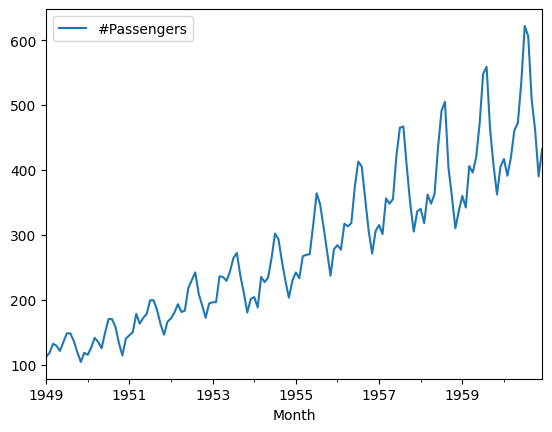

In [10]:
df.plot()

Observation- Data is seasonal and non-stationary.

# **Dickey Fuller Test- to check stationarity of data**

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adf_test(df['#Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The null hypothesis is rejected and the data is non-stationary.
Hence, we have to perform **differencing** to make the data stationary.

In [14]:
#DIFFERENCING
df['Passengers First Difference']=df['#Passengers']-df['#Passengers'].shift(1)

In [15]:
df.head()

,#Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [16]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Stil non-stationary, hence repeating differencing.

In [17]:
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [18]:
df.head()

,#Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [19]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Now checking for seasonal data

In [20]:
#Checking for 12 months
df['Passengers 12 Difference']=df['#Passengers']-df['#Passengers'].shift(12)


In [21]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**Conclusion- Hence, d= 2 and seasonal difference= 12 months.**

# Plotting PACF and ACF graph

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

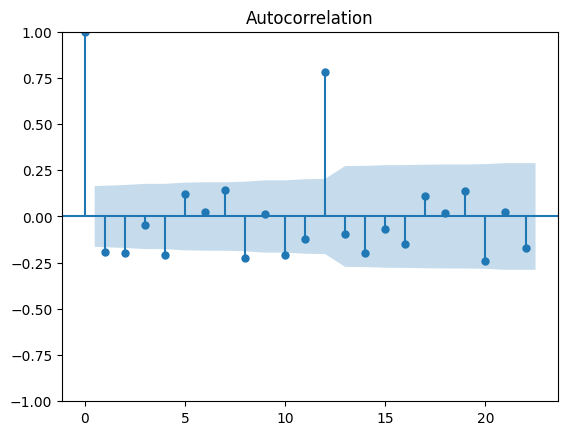

In [23]:
acf = plot_acf(df["Passengers Second Difference"].dropna())

**q=12**

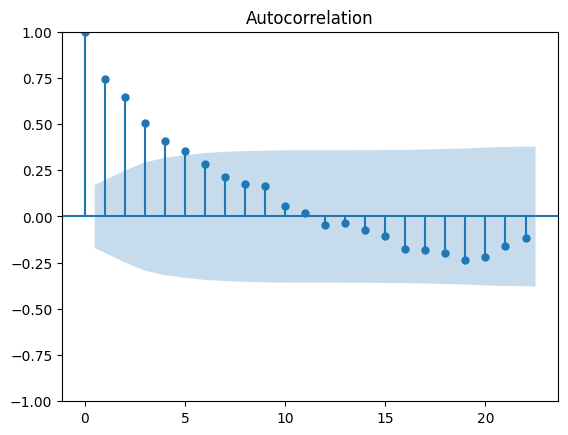

In [24]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())

**q=5**

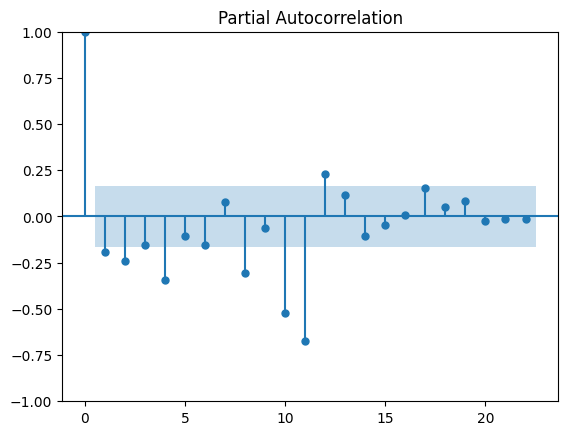

In [25]:
pacf = plot_pacf(df["Passengers Second Difference"].dropna())

**p=2 or 4 or 12**

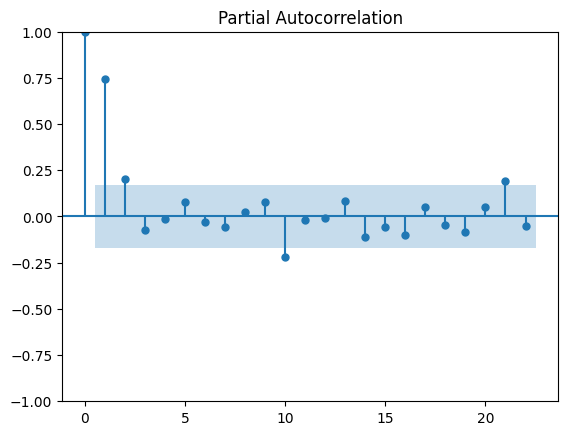

In [26]:
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

**p=2 or 10**

# Train and Test Split

In [27]:
df

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [28]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [29]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [30]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [31]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [32]:
train_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


# ARIMA Model

In [33]:
#Create ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model_ARIMA=ARIMA(train_data['#Passengers'],order=(12,2,12))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
model_Arima_fit=model_ARIMA.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:               ARIMA(12, 2, 12)   Log Likelihood                -306.223
Date:                Mon, 01 Jul 2024   AIC                            662.445
Time:                        12:27:13   BIC                            722.613
Sample:                    01-01-1949   HQIC                           686.602
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3294      0.813     -0.405      0.685      -1.923       1.264
ar.L2         -0.5924      0.749     -0.791      0.429      -2.060       0.875
ar.L3         -0.3796      0.771     -0.492      0.622      -1.891       1.131
ar.L4         -0.5011      0.716     -0.700      0.484      -1.904       0.902
ar.L5         -0.4702      0.750     -0.627      0.531      -1.940       1.000
ar.L6         -0.3758      0.789     -0.476      0.634      -1.922       1.170
ar.L7         -0.5336      0.657     -0.812      0.417      -1.821       0.754
ar.L8         -0.4415      0.763     -0.579      0.563      -1.936       1.053
ar.L9         -0.5141      0.722     -0.712      0.477      -1.930       0.902
ar.L10        -0.4536      0.769     -0.590      0.555      -1.961       1.053
ar.L11        -0.3804      0.712     -0.534      0.593      -1.777       1.016
ar.L12         0.3539      0.659      0.537      0.591      -0.938       1.646
ma.L1         -0.8651      0.923     -0.937      0.349      -2.675       0.945
ma.L2          0.2990      1.093      0.274      0.784      -1.844       2.442
ma.L3         -0.4680      1.190     -0.393      0.694      -2.801       1.865
ma.L4          0.2880      1.283      0.224      0.822      -2.227       2.803
ma.L5         -0.0174      1.430     -0.012      0.990      -2.821       2.786
ma.L6         -0.2217      1.473     -0.151      0.880      -3.108       2.665
ma.L7          0.4035      1.289      0.313      0.754      -2.123       2.930
ma.L8         -0.5164      1.079     -0.479      0.632      -2.630       1.598
ma.L9          0.6574      0.816      0.805      0.421      -0.942       2.257
ma.L10        -0.5796      0.616     -0.940      0.347      -1.788       0.629
ma.L11         0.2752      0.486      0.566      0.571      -0.678       1.228
ma.L12        -0.1914      0.387     -0.495      0.621      -0.950       0.567
sigma2        77.0333     26.998      2.853      0.004      24.118     129.948
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.84   Prob(JB):                         0.36
Heteroskedasticity (H):               2.23   Skew:                             0.38
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediction using ARIMA

In [37]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

In [38]:
pred

1956-01-01    286.353375
1956-02-01    281.367863
1956-03-01    296.998144
1956-04-01    308.877555
1956-05-01    310.945792
1956-06-01    351.908473
1956-07-01    399.453520
1956-08-01    372.329080
1956-09-01    345.051267
1956-10-01    307.498904
1956-11-01    276.537233
1956-12-01    308.392607
1957-01-01    321.934614
1957-02-01    308.573819
1957-03-01    322.777305
1957-04-01    334.500884
1957-05-01    340.777897
1957-06-01    384.567674
1957-07-01    425.542632
1957-08-01    402.625238
1957-09-01    372.730094
1957-10-01    340.695467
1957-11-01    313.302677
1957-12-01    338.770867
1958-01-01    354.393699
1958-02-01    337.404067
1958-03-01    347.443729
1958-04-01    361.326603
1958-05-01    370.798067
1958-06-01    415.674180
1958-07-01    452.847102
1958-08-01    431.421918
1958-09-01    401.481226
1958-10-01    373.409636
1958-11-01    349.666610
1958-12-01    370.310336
1959-01-01    385.511314
1959-02-01    366.834931
1959-03-01    372.416495
1959-04-01    388.516270


In [39]:
residuals

Month
1956-01-01     -2.353375
1956-02-01     -4.367863
1956-03-01     20.001856
1956-04-01      4.122445
1956-05-01      7.054208
1956-06-01     22.091527
1956-07-01     13.546480
1956-08-01     32.670920
1956-09-01      9.948733
1956-10-01     -1.498904
1956-11-01     -5.537233
1956-12-01     -2.392607
1957-01-01     -6.934614
1957-02-01     -7.573819
1957-03-01     33.222695
1957-04-01     13.499116
1957-05-01     14.222103
1957-06-01     37.432326
1957-07-01     39.457368
1957-08-01     64.374762
1957-09-01     31.269906
1957-10-01      6.304533
1957-11-01     -8.302677
1957-12-01     -2.770867
1958-01-01    -14.393699
1958-02-01    -19.404067
1958-03-01     14.556271
1958-04-01    -13.326603
1958-05-01     -7.798067
1958-06-01     19.325820
1958-07-01     38.152898
1958-08-01     73.578082
1958-09-01      2.518774
1958-10-01    -14.409636
1958-11-01    -39.666610
1958-12-01    -33.310336
1959-01-01    -25.511314
1959-02-01    -24.834931
1959-03-01     33.583505
1959-04-01      7.4

<Axes: ylabel='Density'>

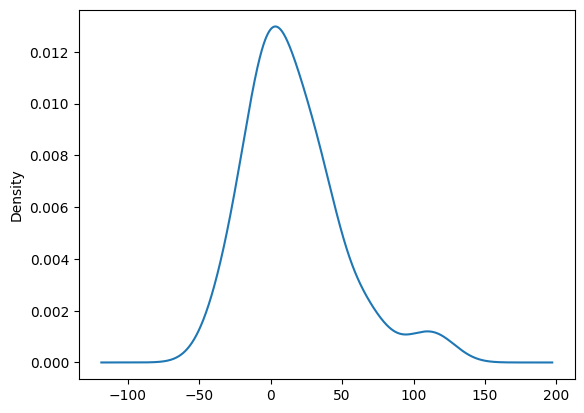

In [40]:
residuals.plot(kind='kde')

In [41]:
test_data['Predicted_ARIMA']=pred

/tmp/ipykernel_34/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

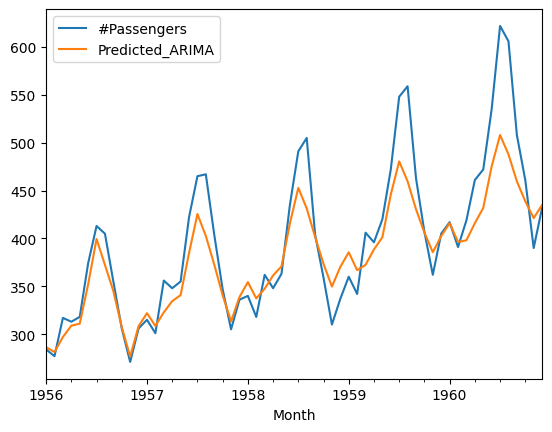

In [42]:
test_data[['#Passengers','Predicted_ARIMA']].plot()

# SARIMA Model

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(2,0,5),seasonal_order=(0,1,0,12))

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
model_SARIMA_fit=model_SARIMA.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18183D+00    |proj g|=  3.68354D-02

At iterate    5    f=  3.17618D+00    |proj g|=  1.91560D-02

At iterate   10    f=  3.17380D+00    |proj g|=  3.11290D-03

At iterate   15    f=  3.17305D+00    |proj g|=  1.42250D-03

At iterate   20    f=  3.17300D+00    |proj g|=  2.86141D-03

At iterate   25    f=  3.17222D+00    |proj g|=  1.11570D-02

At iterate   30    f=  3.17065D+00    |proj g|=  9.79228D-03

At iterate   35    f=  3.17045D+00    |proj g|=  2.40416D-04

At iterate   40    f=  3.17045D+00    |proj g|=  2.17044D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [46]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(2, 0, 5)x(0, 1, [], 12)   Log Likelihood                -266.318
Date:                             Mon, 01 Jul 2024   AIC                            548.636
Time:                                     12:27:15   BIC                            566.850
Sample:                                 01-01-1949   HQIC                           555.887
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3148      1.447      0.909      0.363      -1.521       4.150
ar.L2         -0.3310      1.423     -0.233      0.816      -3.121       2.459
ma.L1         -0.5814      1.436     -0.405      0.685      -3.395       2.232
ma.L2          0.1519      0.425      0.358      0.721      -0.681       0.985
ma.L3         -0.2934      0.221     -1.325      0.185      -0.727       0.141
ma.L4          0.1246      0.411      0.303      0.762      -0.681       0.930
ma.L5          0.0729      0.174      0.419      0.675      -0.268       0.413
sigma2        92.1028     17.259      5.337      0.000      58.276     125.930
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.87   Prob(JB):                         0.28
Heteroskedasticity (H):               2.13   Skew:                             0.45
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediction using SARIMA

In [47]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

<Axes: >

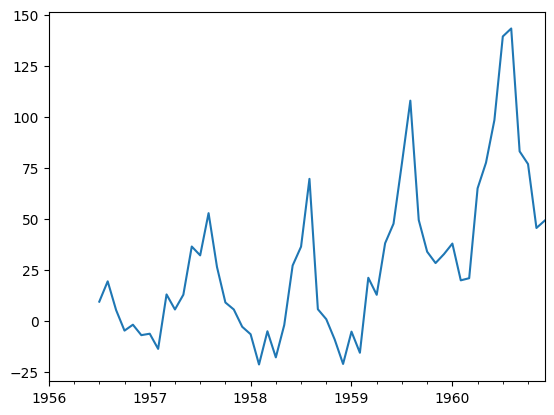

In [48]:
residuals.plot()

<Axes: ylabel='Density'>

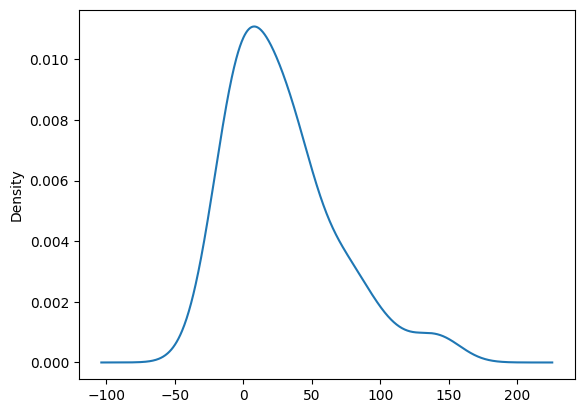

In [49]:
residuals.plot(kind='kde')

In [50]:
test_data['Predicted_SARIMA']=pred_Sarima

/tmp/ipykernel_34/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<Axes: xlabel='Month'>

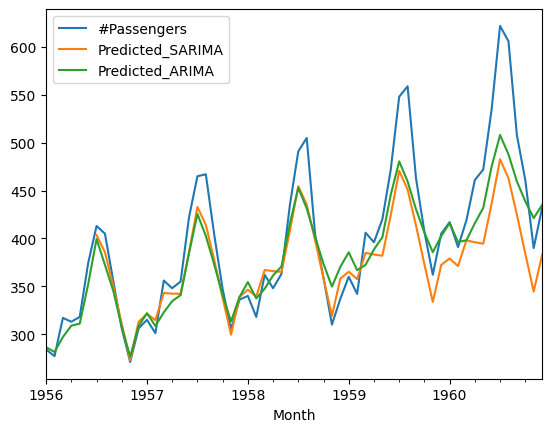

In [51]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

# FbProphet

In [52]:
!pip install prophet

In [53]:
import prophet

In [54]:
df=pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')

In [55]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The input to Prophet is always a dataframe with two columns: ds and y.

In [56]:
df.columns = ['ds','y']

In [57]:
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [58]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [59]:
df['ds']=pd.to_datetime(df['ds'])

In [60]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [61]:
from prophet import Prophet

In [62]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [63]:
model=Prophet()

In [64]:
model.fit(df)

12:27:31 - cmdstanpy - INFO - Chain [1] start processing
12:27:31 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

Yearly seasonality taken by model.

In [66]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [67]:
prediction=model.predict(future_dates)

In [68]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.967407,470.046047,529.071179,520.374424,521.515205,-21.421835,-21.421835,-21.421835,-21.421835,-21.421835,-21.421835,0.0,0.0,0.0,499.545571
505,1961-11-28,521.068249,468.111365,527.242727,520.473004,521.618625,-23.119434,-23.119434,-23.119434,-23.119434,-23.119434,-23.119434,0.0,0.0,0.0,497.948814
506,1961-11-29,521.169091,467.215894,524.441393,520.571881,521.721327,-25.533545,-25.533545,-25.533545,-25.533545,-25.533545,-25.533545,0.0,0.0,0.0,495.635545
507,1961-11-30,521.269933,463.934968,520.018473,520.670626,521.823472,-28.622504,-28.622504,-28.622504,-28.622504,-28.622504,-28.622504,0.0,0.0,0.0,492.647429
508,1961-12-01,521.370775,461.431333,516.539569,520.768865,521.925617,-32.327056,-32.327056,-32.327056,-32.327056,-32.327056,-32.327056,0.0,0.0,0.0,489.043718


In [69]:
prediction.shape

(509, 16)

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


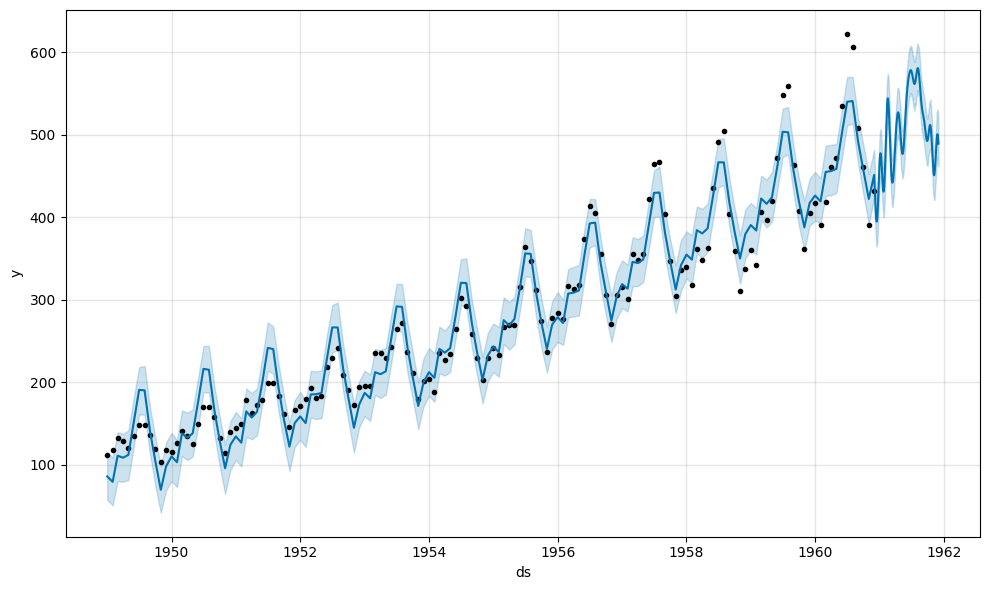

In [70]:
### plot the predicted projection
model.plot(prediction);

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

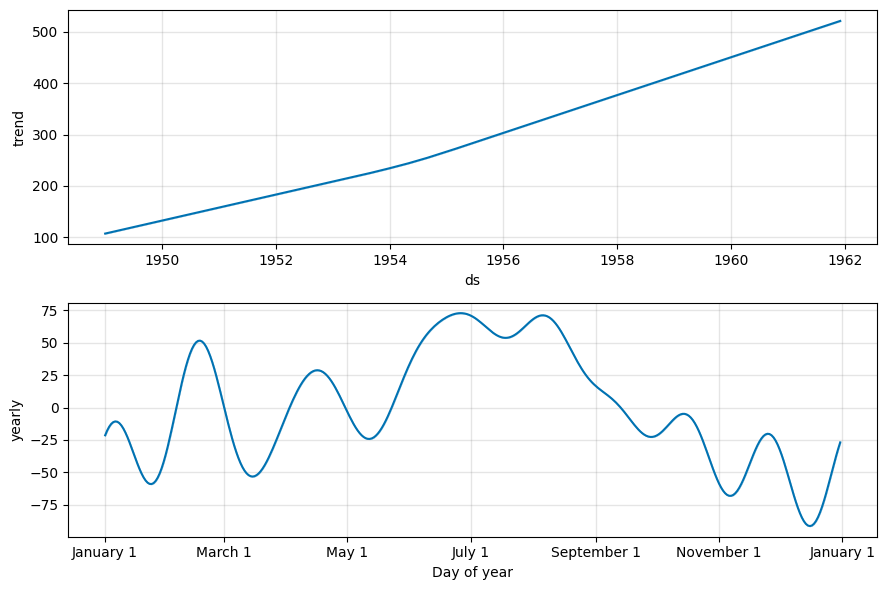

In [71]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction);

In [75]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/19 [00:00<?, ?it/s]

12:54:56 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
12:55:14 - cmdstanpy - INFO - Chain [1] start processing
12:55:14 - cmdstanpy - INFO - Chain [1] done processing
12:55:15 - cmdstanpy - INFO - Chain [1] start processing
12:55:15 - cmdstanpy - INFO - Chain [1] done processing
12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:16 - cmdstanpy - INFO - Chain [1] done processing
12:55:16 - cmdstanpy - INFO - Chain [1] start processing
12:55:17 - cmdstanpy - INFO - Chain [1] done processing
12:55:17 - cmdstanpy - INFO - Chain [1] start processing
12:55:18 - cmdstanpy - INFO - Chain [1] done processing
12:55:18 - cmdstanpy - INFO - Chain [1] start processing
12:55:19 - cmdstanpy - INFO - Chain [1] done processing
12:55:19 - cmdstanpy - INFO - Chain [1] start processing
12:55:19 - cmdstanpy - INFO - Chain [1] done processing
12:55:20 - cmdstanpy - INFO - Chain [1] start processing
12:55:20 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.191693,155.845236,156.575640,150,1951-01-18
1,1951-03-01,168.314852,167.121534,169.477442,178,1951-01-18
2,1951-04-01,157.254632,154.911241,159.542706,163,1951-01-18
3,1951-05-01,143.937862,140.200040,147.436421,172,1951-01-18
4,1951-06-01,180.110241,174.786563,184.911528,178,1951-01-18


In [76]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,156.191693,155.845236,156.575640,150,1951-01-18
1,1951-03-01,168.314852,167.121534,169.477442,178,1951-01-18
2,1951-04-01,157.254632,154.911241,159.542706,163,1951-01-18
3,1951-05-01,143.937862,140.200040,147.436421,172,1951-01-18
4,1951-06-01,180.110241,174.786563,184.911528,178,1951-01-18
...,...,...,...,...,...,...
223,1960-08-01,527.231216,502.280146,554.410676,606,1959-12-02
224,1960-09-01,486.027892,459.698999,511.571997,508,1959-12-02
225,1960-10-01,452.354926,426.971848,478.918004,461,1959-12-02
226,1960-11-01,422.535886,397.415359,449.144605,390,1959-12-02


In [77]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

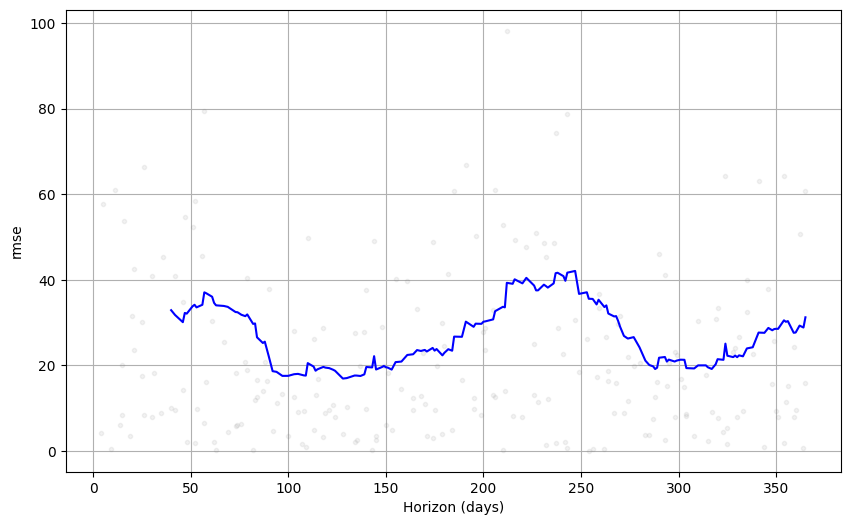

In [79]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')